# Exercise on the Berry-Levinsohn-Pakes Model and Merger Analysis

In [8]:
import pyblp
import numpy as np
import pandas as pd 

pyblp.options.digits = 2
pyblp.options.verbose = False
pyblp.__version__

'1.1.0'

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Please use data from [Berry, Levinsohn, and Pakes (1995)](https://pyblp.readthedocs.io/en/stable/references.html#berry-levinsohn-and-pakes-1995) to estimate a model and simulate a merger in the automobile industry.


## Merger Analysis with Automobile Data


### Loading the Data

Use [pandas](https://pandas.pydata.org/) to load two sets of data:

1. `product_data`, which contains prices, shares, and other product characteristics.
2. `agent_data`, which contains draws from the distribution of heterogeneity.

In [10]:
product_data = pd.read_csv(pyblp.data.BLP_PRODUCTS_LOCATION)
product_data.head()

,market_ids,clustering_ids,car_ids,firm_ids,region,shares,prices,hpwt,air,mpd,...,supply_instruments2,supply_instruments3,supply_instruments4,supply_instruments5,supply_instruments6,supply_instruments7,supply_instruments8,supply_instruments9,supply_instruments10,supply_instruments11
0,1971,AMGREM71,129,15,US,0.001051,4.935802,0.528997,0,1.888146,...,0.0,1.705933,1.595656,87.0,-61.959985,0.0,46.060389,29.786989,0.0,1.888146
1,1971,AMHORN71,130,15,US,0.000670,5.516049,0.494324,0,1.935989,...,0.0,1.680910,1.490295,87.0,-61.959985,0.0,46.060389,29.786989,0.0,1.935989
2,1971,AMJAVL71,132,15,US,0.000341,7.108642,0.467613,0,1.716799,...,0.0,1.801067,1.357703,87.0,-61.959985,0.0,46.060389,29.786989,0.0,1.716799
3,1971,AMMATA71,134,15,US,0.000522,6.839506,0.426540,0,1.687871,...,0.0,1.818061,1.261347,87.0,-61.959985,0.0,46.060389,29.786989,0.0,1.687871
4,1971,AMAMBS71,136,15,US,0.000442,8.928395,0.452489,0,1.504286,...,0.0,1.933210,1.237365,87.0,-61.959985,0.0,46.060389,29.786989,0.0,1.504286


In [11]:
agent_data = pd.read_csv(pyblp.data.BLP_AGENTS_LOCATION)
agent_data.head()

,market_ids,weights,nodes0,nodes1,nodes2,nodes3,nodes4,income
0,1971,0.000543,1.192188,0.478777,0.980830,-0.824410,2.473301,109.560369
1,1971,0.000723,1.497074,-2.026204,-1.741316,1.412568,-0.747468,45.457314
2,1971,0.000544,1.438081,0.813280,-1.749974,-1.203509,0.049558,127.146548
3,1971,0.000701,1.768655,-0.177453,0.286602,0.391517,0.683669,22.604045
4,1971,0.000549,0.849970,-0.135337,0.735920,1.036247,-1.143436,170.226032


Check https://pyblp.readthedocs.io/en/stable/_notebooks/tutorial/blp.html to see how to estimate the BLP model.

In [12]:
product_data = pd.read_csv(pyblp.data.NEVO_PRODUCTS_LOCATION)
agent_data = pd.read_csv(pyblp.data.NEVO_AGENTS_LOCATION)
product_formulations = (
   pyblp.Formulation('0 + prices', absorb='C(product_ids)'),
   pyblp.Formulation('1 + prices + sugar + mushy')
)
agent_formulation = pyblp.Formulation('0 + income + income_squared + age + child')
problem = pyblp.Problem(product_formulations, product_data, agent_formulation, agent_data)
problem

Dimensions:
 T    N     F    I     K1    K2    D    MD    ED 
---  ----  ---  ----  ----  ----  ---  ----  ----
94   2256   5   1880   1     4     4    20    1  

Formulations:
       Column Indices:           0           1           2      3  
-----------------------------  ------  --------------  -----  -----
 X1: Linear Characteristics    prices                              
X2: Nonlinear Characteristics    1         prices      sugar  mushy
       d: Demographics         income  income_squared   age   child

In [14]:
initial_sigma = np.diag([0.3302, 2.4526, 0.0163, 0.2441])
initial_pi = [
  [ 5.4819,  0,      0.2037,  0     ],
  [15.8935, -1.2000, 0,       2.6342],
  [-0.2506,  0,      0.0511,  0     ],
  [ 1.2650,  0,     -0.8091,  0     ]
]
results = problem.solve(
    initial_sigma,
    initial_pi,
    optimization=pyblp.Optimization('bfgs', {'gtol': 1e-5}),
    method='1s'
)
results

Problem Results Summary:
GMM   Objective  Gradient      Hessian         Hessian     Clipped  Weighting Matrix  Covariance Matrix
Step    Value      Norm    Min Eigenvalue  Max Eigenvalue  Shares   Condition Number  Condition Number 
----  ---------  --------  --------------  --------------  -------  ----------------  -----------------
 1    +4.6E+00   +6.9E-06     +3.2E-05        +1.6E+04        0         +6.9E+07          +8.4E+08     

Cumulative Statistics:
Computation  Optimizer  Optimization   Objective   Fixed Point  Contraction
   Time      Converged   Iterations   Evaluations  Iterations   Evaluations
-----------  ---------  ------------  -----------  -----------  -----------
 00:00:34       Yes          51           57          46380       143976   

Nonlinear Coefficient Estimates (Robust SEs in Parentheses):
Sigma:      1         prices      sugar       mushy     |   Pi:      income    income_squared     age        child   
------  ----------  ----------  ----------  -------

In [16]:
elasticities = results.compute_elasticities()
diversions = results.compute_diversion_ratios()

In [17]:
means = results.extract_diagonal_means(elasticities)

In [18]:
aggregates = results.compute_aggregate_elasticities(factor=0.1)

# Exercises 1: Marginal costs and markups

*Hint: use https://pyblp.readthedocs.io/en/stable/_notebooks/tutorial/blp.html and https://pyblp.readthedocs.io/en/stable/_notebooks/tutorial/post_estimation.html*

Plot a histogram of marginal costs

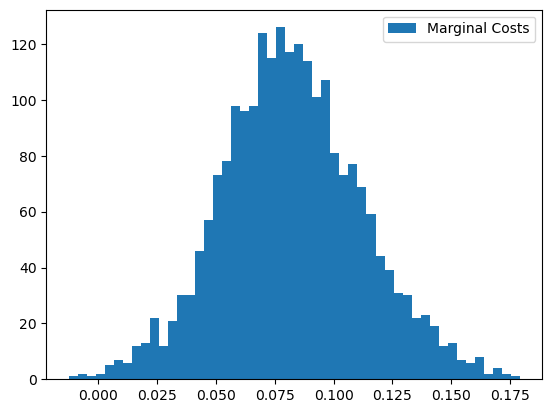

In [19]:
costs = results.compute_costs()
plt.hist(costs, bins=50);
plt.legend(["Marginal Costs"]);

Plot a histogram of markups

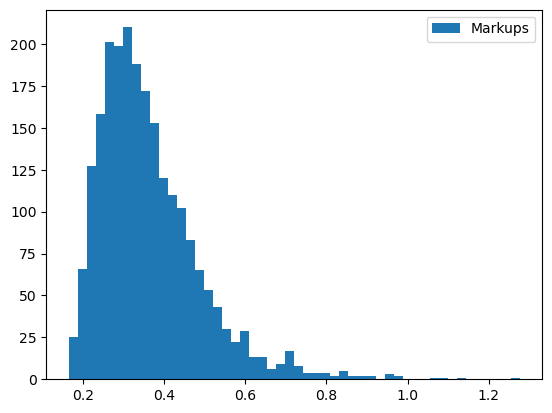

In [20]:
markups = results.compute_markups(costs=costs)
plt.hist(markups, bins=50);
plt.legend(["Markups"]);

# Exercise 2: Merger

Assume all automobile producers in the EU merge. (*Hint: use the column `region`
in the BLP dataset.*)

In [23]:
hhi = results.compute_hhi()
profits = results.compute_profits(costs=costs)
cs = results.compute_consumer_surpluses()

In [25]:
product_data['merger_ids'] = product_data['firm_ids'].replace(2, 1)

In [32]:
changed_prices = results.compute_prices(
    firm_ids=product_data['merger_ids'],
    costs=costs
)

In [37]:
changed_shares = results.compute_shares(changed_prices)

In [38]:
changed_hhi = results.compute_hhi(
    firm_ids=product_data['merger_ids'],
    shares=changed_shares
)

In [39]:
changed_markups = results.compute_markups(changed_prices, costs)

In [40]:
changed_profits = results.compute_profits(changed_prices, changed_shares, costs)

(a) Plot a histogram of changed profits

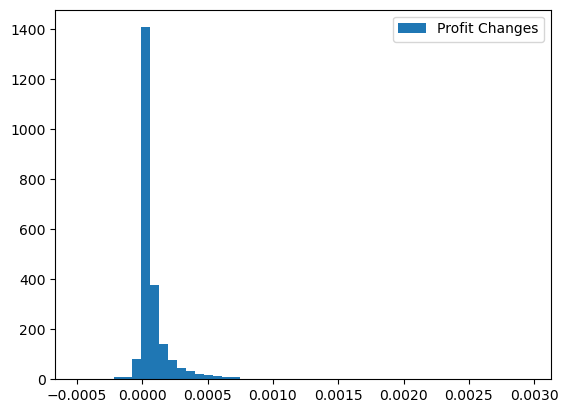

In [41]:
changed_profits = results.compute_profits(changed_prices, changed_shares, costs)
plt.hist(changed_profits - profits, bins=50);
plt.legend(["Profit Changes"]);

(b) Plot a histogram of changed consumer surplus

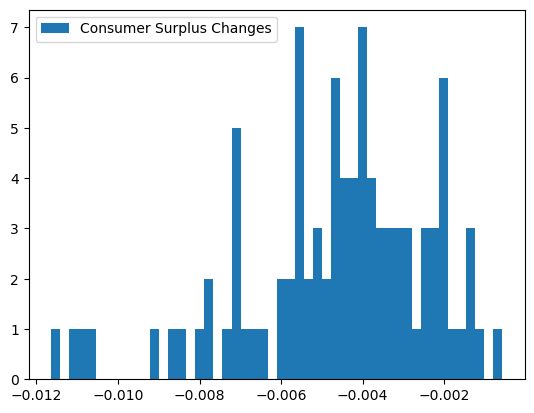

In [42]:
changed_cs = results.compute_consumer_surpluses(changed_prices)
plt.hist(changed_cs - cs, bins=50);
plt.legend(["Consumer Surplus Changes"]);

(c) Plot a histogram of the changed markups after the merger.

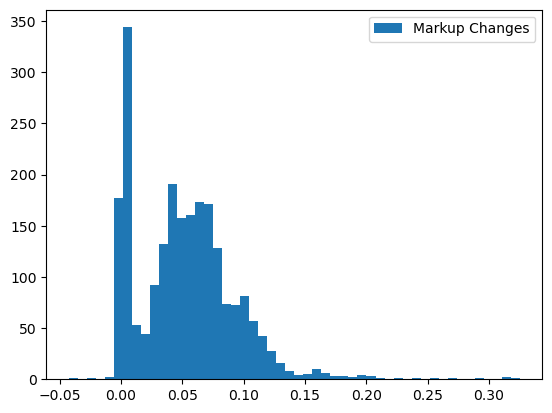

In [43]:
plt.hist(changed_markups - markups, bins=50);
plt.legend(["Markup Changes"]);

(d) Create a scatterplot of pre-merger and post-merger markups for the various products. (*Hint: you can create a scatterplot with the command `plt.plot(x,y,'.')` for arrays `x` and `y`.)

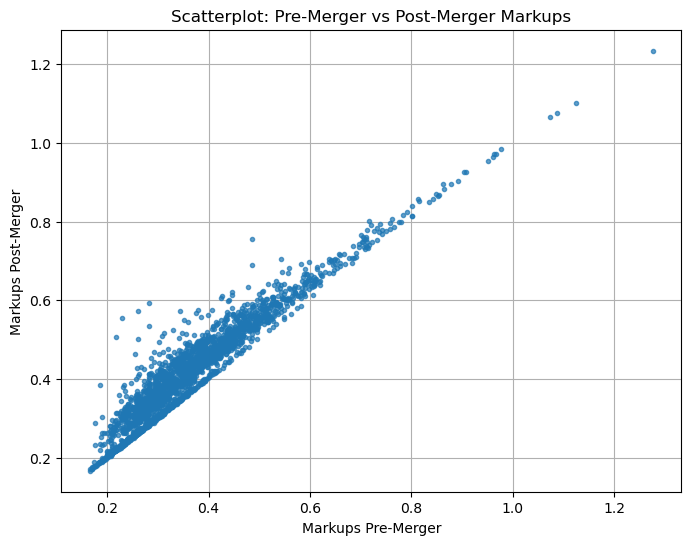

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(markups, changed_markups, '.', alpha=0.7)
plt.xlabel("Markups Pre-Merger")
plt.ylabel("Markups Post-Merger")
plt.title("Scatterplot: Pre-Merger vs Post-Merger Markups")
plt.grid(True)
plt.show()
